## Linear SVM Example

In [1]:
# Import Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Generate Synthetic Dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear SVM
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)

# Predict and Evaluate
y_pred = linear_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Linear SVM Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Linear SVM Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



- **Decision Boundary**

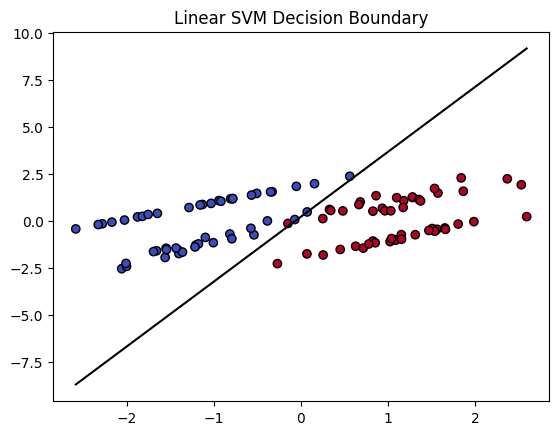

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

# Plotting the Decision Boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
w = linear_svm.coef_[0]
b = linear_svm.intercept_[0]

# Calculate decision boundary
x_points = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
decision_boundary = -(w[0] / w[1]) * x_points - b / w[1]

plt.plot(x_points, decision_boundary, color='black')
plt.title("Linear SVM Decision Boundary")
plt.show()

##
---

## Non-Linear SVM Example

In [3]:
# Import Libraries
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Generate Non-Linear Dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train RBF Kernel SVM
rbf_svm = SVC(kernel='rbf', C=1.0, gamma=0.5)
rbf_svm.fit(X_train, y_train)

# Predict and Evaluate
y_pred = rbf_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"RBF SVM Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

RBF SVM Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        28

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



- **Decision Boundary**

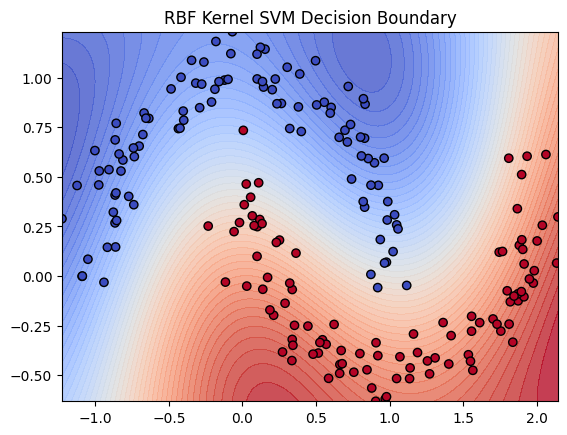

In [4]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

# Plotting the Decision Boundary for RBF Kernel
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap='coolwarm', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("RBF Kernel SVM Decision Boundary")
plt.show()

##
---

## Example with Iris Data set

In [5]:
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv("../datasets/Iris.csv")
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
36,37,5.5,3.5,1.3,0.2,Iris-setosa
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica
1,2,4.9,3.0,1.4,0.2,Iris-setosa
75,76,6.6,3.0,4.4,1.4,Iris-versicolor


In [7]:
data = data.drop(["Id"], axis=1)
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
import seaborn as sns

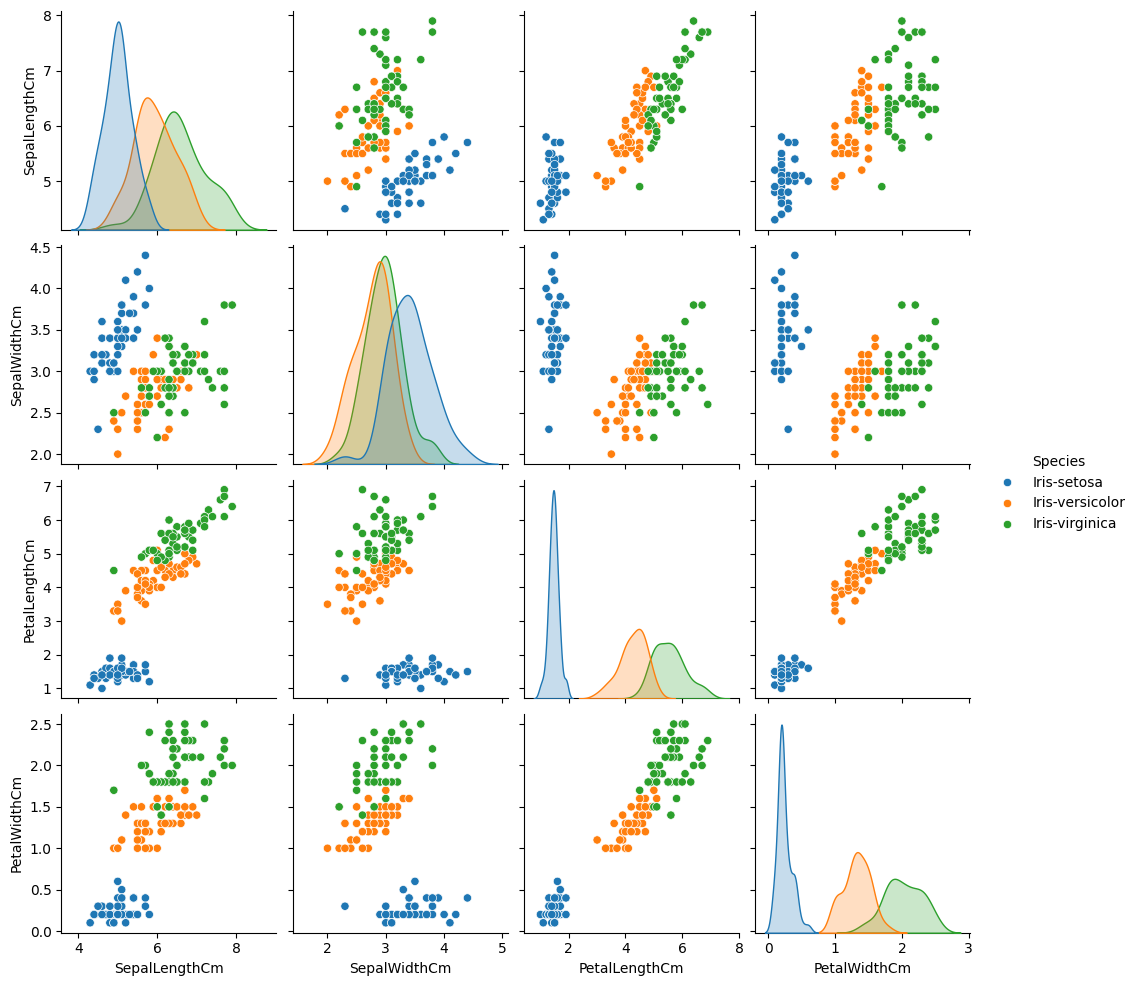

In [11]:
sns.pairplot(data=data, hue="Species")

In [12]:
x_vals = data.drop(["Species"], axis="columns")
x_vals.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
71,6.1,2.8,4.0,1.3


In [13]:
y_vals = data.Species
y_vals.sample()

102    Iris-virginica
Name: Species, dtype: object

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2)

In [16]:
from sklearn.svm import SVC # SVC is used for classification problems

In [17]:
model = SVC()
model.fit(X=x_train, y=y_train)

SVC()

In [18]:
model.kernel

'rbf'

In [19]:
y_pred = model.predict(X=x_test)
y_pred[:5]

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [20]:
y_test[0:5]

20         Iris-setosa
142     Iris-virginica
70     Iris-versicolor
96     Iris-versicolor
71     Iris-versicolor
Name: Species, dtype: object

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
acc

1.0

In [23]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[ 8,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 13]])